# Самостоятельный проект: Принятие решений на основе данных

---
Мы подготовили список гипотез для увеличения выручки.

Необходимо: 
- Проанализировать гипотезы

- Проанализировать результаты А/В-тестирования

**Цель проекта:** Определить дальнейшие действия отностительно А/В-тестирования:

    1. Остановить тест, зафиксировать победу одной из групп. 
    
    2. Остановить тест, зафиксировать отсутствие различий между группами. 
    
    3. Продолжить тест.

---
Необходимые данные:

**hypothesis** -  9 гипотез по увеличению выручки интернет-магазина:

    hypothesis - краткое описание гипотезы;
    reach - охват пользователей по 10-балльной шкале;
    impact - влияние на пользователей по 10-балльной шкале;
    confidence - уверенность в гипотезе по 10-балльной шкале;
    efforts - затраты ресурсов на проверку гипотезы по 10-балльной шкале.
    
**orders** - данные А/В-тестирования по заказам:

    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.
    
**visitors** - данные А/В-тестирования по пользователям:

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Предобработка данных

In [2]:
# hypothesis = pd.read_csv('/Users/dianamini/Developer/Data/hypothesis.csv')
# pd.set_option('display.max_columns', None)
# pd.options.display.max_colwidth = 150 
# hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.head(1)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6


In [4]:
# orders = pd.read_csv('/Users/dianamini/Developer/Data/orders_1.csv')
# orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
# visitors = pd.read_csv('/Users/dianamini/Developer/Data/visitors.csv')
# visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [8]:
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [9]:
visitors['date'] = pd.to_datetime(visitors['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [10]:
orders.duplicated().sum()

0

In [11]:
visitors.duplicated().sum()

0

In [12]:
orders_one_on_group = orders.drop_duplicates(subset=['visitorId', 'group'], keep='first')
orders_dist = orders_one_on_group[orders_one_on_group.duplicated(['visitorId'], keep=False)]
orders_dist.head()

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
20,2904772834,963407295,2019-08-15,300,B
23,4252514150,351125977,2019-08-15,15185,B
24,1162046357,3234906277,2019-08-15,7555,B
26,2223239646,199603092,2019-08-15,3488,A


In [13]:
orders_dist[orders_dist['visitorId']==4069496402]

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
1070,1473132782,4069496402,2019-08-12,640,B


---
- Заменила типы данных в столбцах с датами в таблицах visitors и orders
- Привела к нижнему регистру названия столбцов таблицы hypothesis
- Проверила таблицы на дубликаты
- Есть пользователи, состоящие в обеих группах. Это либо тестовые пользователи, либо проблема в системе сплитования аудитории.

---

## Приоритизация гипотез

In [14]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [15]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis['ICE'] = np.round(hypothesis['ICE']). astype(int)
hypothesis_ice = hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
hypothesis_ice

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1


In [16]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis_rice = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
hypothesis_rice 

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [17]:
hypothesis_new = pd.merge(hypothesis_ice, hypothesis_rice, on='hypothesis')

hypothesis_new

,hypothesis,ICE,RICE
0,"Запустить акцию, дающую скидку на товар в день рождения",16,16.2
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13,40.0
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11,112.0
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8,40.0
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7,56.0
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,4.0
6,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1,9.0
7,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,3.0
8,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1,4.0


---
- В таблице hypothesis_ice самый высокий показатель ICE у 8-й гипотезы: Запустить акцию, дающую скидку на товар в день рождения.
- В таблице hypothesis_rice самый высокий показатель RICE у 7-й гипотезы: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. 
- 7-ая гипотеза вышла вперед, так как у нее самый высокий показатель reach: 10. У 8-й гипотезы он самый низкий.
- Наиболее перспективными гипотезами можно считать: 
    1. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
    2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
    3. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
    4. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
---

## Анализ А/В-тестирования

### Кумулятивная выручка по группам

In [18]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)

ordersAggregated = ordersAggregated.sort_values(by=['date','group']) 
visitorsAggregated = visitorsAggregated.sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


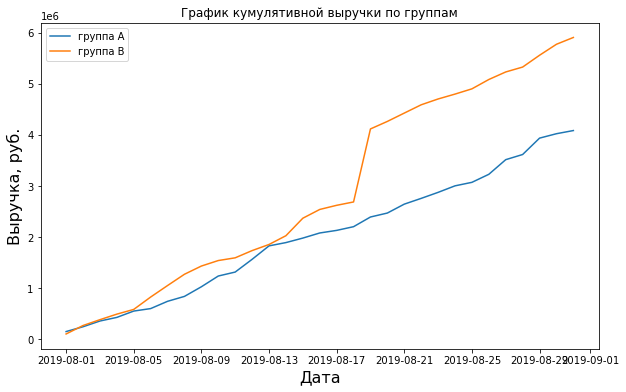

In [19]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='группа B')
plt.ylabel('Выручка, руб.',fontsize=16)
plt.xlabel('Дата',fontsize=16)
plt.title('График кумулятивной выручки по группам')
plt.legend()
plt.show()

---
- Выручка увеличивается в течение всего теста у обоих групп, но группа В значительно обгоняет группу А
- У группы В наблюдается резкий скачок, проверю на выбросы

---

### Кумулятивный средний чек по группам

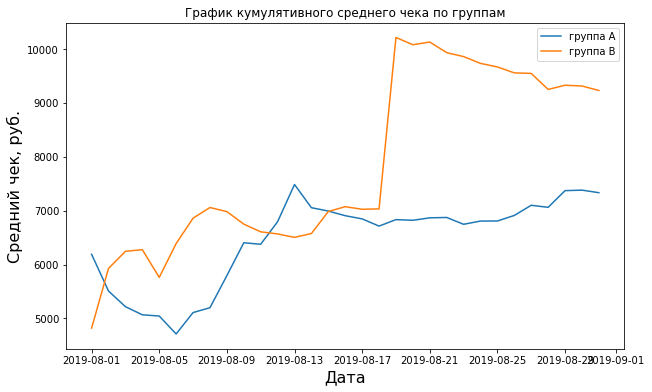

In [20]:
plt.figure(figsize=(10,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='группа B')
plt.ylabel('Средний чек, руб.',fontsize=16)
plt.xlabel('Дата',fontsize=16)
plt.title('График кумулятивного среднего чека по группам')
plt.legend()
plt.show()

---
- Средний чек становится равномерным к концу теста: показатели группы А начинают расти, а группы В падают
- Опять же всплеск в группе В говорит нам о наличии крупного заказа

---

### График относительного изменения кумулятивного среднего чека

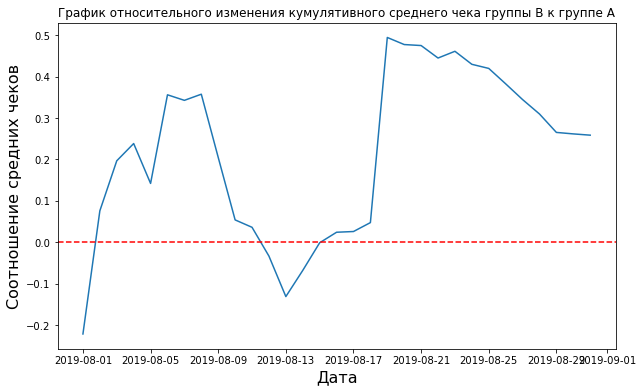

In [21]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.ylabel('Соотношение средних чеков',fontsize=16)
plt.xlabel('Дата',fontsize=16)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='red', linestyle='--')

---
- График скачет между сигментами, значит аномальные выбросы точно есть

---

### Кумулятивной конверсии по группам

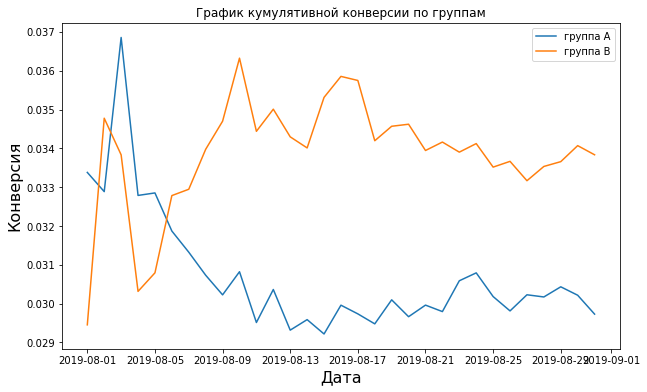

In [22]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(10,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='группа B')
plt.ylabel('Конверсия',fontsize=16)
plt.xlabel('Дата',fontsize=16)
plt.title('График кумулятивной конверсии по группам')
plt.legend()
plt.show()

---
- Группа В показывает большую конверсию, в отличае от руппы А
- Обе группы еще не зафиксировались и продолжают небольшие колебания

---

### Относительное изменение кумулятивной конверсии

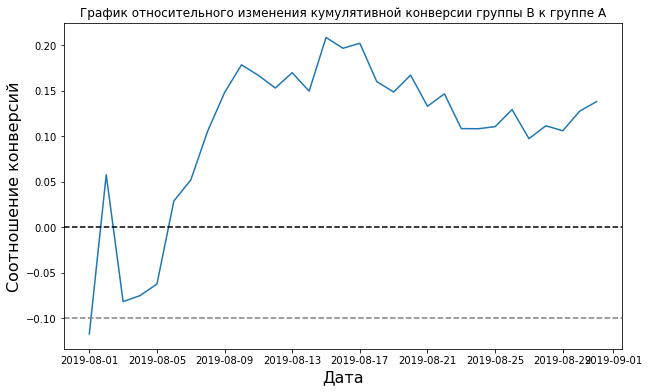

In [23]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.ylabel('Соотношение конверсий',fontsize=16)
plt.xlabel('Дата',fontsize=16)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.show()

---
Конверсия группы В резко подскочила в начале теста, потом так же резко упала. Далее постепенно увеличивается, с небольшими колебаниями.

---

### Точечный график количества заказов по пользователям

In [24]:
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsers.columns = ['visitorId', 'transactions']
ordersByUsers = ordersByUsers.sort_values(by='transactions', ascending=False)
ordersByUsers

,visitorId,transactions
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


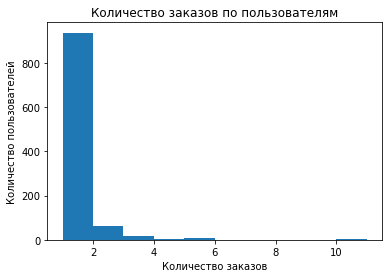

In [25]:
plt.hist(ordersByUsers['transactions']) 
plt.ylabel('Количество пользователей',fontsize=10)
plt.xlabel('Количество заказов',fontsize=10)
plt.title('Количество заказов по пользователям')
plt.show()

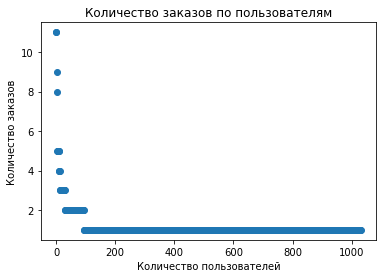

In [26]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['transactions']) 
plt.ylabel('Количество заказов',fontsize=10)
plt.xlabel('Количество пользователей',fontsize=10)
plt.title('Количество заказов по пользователям')
plt.show()

---
Покупателей с 1-2 заказами больше всего.

---

### Перцентили количества заказов на пользователя

In [27]:
np.percentile(ordersByUsers['transactions'], [90, 95, 99])

array([1., 2., 4.])

---
- Не более 5% пользователей оформляли больше 2-х заказов и не более 1% пользователей оформляли больше 4-х.
- Так границей для определения аномальных пользователей можно считать 2 заказа.

---

### Точечный график стоимостей заказов

In [28]:
orders['revenue'].max()

1294500

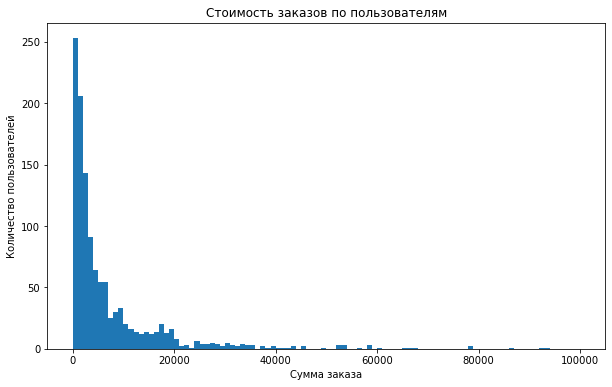

In [29]:
plt.figure(figsize=(10,6))
plt.hist(orders['revenue'], range=(0,100000), bins = 100) 
plt.ylabel('Количество пользователей',fontsize=10)
plt.xlabel('Сумма заказа',fontsize=10)
plt.title('Стоимость заказов по пользователям')
plt.show()

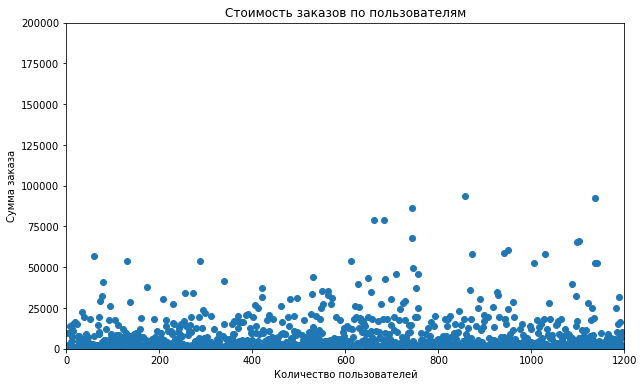

In [30]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(10,6))
plt.scatter(x_values, orders['revenue'])
plt.ylabel('Сумма заказа',fontsize=10)
plt.xlabel('Количество пользователей',fontsize=10)
plt.title('Стоимость заказов по пользователям')
plt.axis([0, 1200, 0, 200000])
plt.show()

---
- Есть аномально большой заказ на 1.294.500р., видимо он и вызвал резкий скачок.
- В среднем покупатели совершают заказы на сумму 25-30 тысяч рублей.

---

### Перцентили стоимости заказов на пользователя

In [31]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

---
Не более 5% заказов дороже 28 тысяч рублей. Думаю, эту цифру и можно считать границей для определения аномальных выбросов.

---

###  Статистическая значимость различий в конверсии между группами по «сырым» данным

In [32]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1,)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']


In [33]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1,)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


In [34]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}),axis=1,).sort_values(by=['date'])
ordersACummulative.columns = ['date','ordersCummulativeA','revenueCummulativeA']

In [35]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),axis=1,).sort_values(by=['date'])
ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB']


In [36]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


---

In [37]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [38]:
print('Группа А:')
print('Количество покупателей - ', len(ordersByUsersA))
print('Кол-во покупок - {}'.format(ordersByUsersA['orders'].sum()))
print('Кол-во посетителей - {}\n'.format(visitors[visitors['group']=='A']['visitors'].sum()))

print('Группа В:')
print('Количество покупателей - ', len(ordersByUsersB))
print('Кол-во покупок - {}'.format(ordersByUsersB['orders'].sum()))
print('Кол-во посетителей - {}\n'.format(visitors[visitors['group']=='B']['visitors'].sum()))

Группа А:
Количество покупателей -  503
Кол-во покупок - 557
Кол-во посетителей - 18736

Группа В:
Количество покупателей -  586
Кол-во покупок - 640
Кол-во посетителей - 18916



In [39]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


**Нулевая гипотеза:** В конверсии групп А и В нет разницы.

**Обратная гипотеза:** В конверсии групп А и В есть разница.

In [40]:
print('Относительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')
print('P-value: {:.4f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По "сырым" данным в конверсии групп A и B есть разница и она статистически значима.')
else:
    print('По "сырым" данным разницы в конверсии групп A и B нет.')

Относительный прирост конверсии группы B по отношению к группе A: 0.138
P-value: 0.0168
По "сырым" данным в конверсии групп A и B есть разница и она статистически значима.


---

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

**Нулевая гипотеза:** В средних чеках групп А и В нет разницы.

**Обратная гипотеза:** В средних чеках групп А и В есть разница.

In [41]:
print('Относительное изменение среднего чека группы В по отношению к группе А: {:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')
print('P-value: {:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По "сырым" данным в средних чеках группы А и В есть разница и она статистически значима.')
else:
    print('По "сырым" данным в средних чеках групп А и В нет разницы.')

Относительное изменение среднего чека группы В по отношению к группе А: 0.259
P-value: 0.729
По "сырым" данным в средних чеках групп А и В нет разницы.


---

### Cтатистическая значимость различий в конверсии между группами по «очищенным» данным

In [42]:
max_revenue = 28000
max_transactions = 2

- Сразу обозначу установленные мной ранее границы определения аномальных выбросов

In [43]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > max_transactions]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > max_transactions]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > max_revenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(74,)


- Всего 74 аномальных пользователя.

---

In [44]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders',),],axis=0,)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders',),],axis=0,)


**Нулевая гипотеза:** В конверсии групп А и В нет разницы.

**Обратная гипотеза:** В конверсии групп А и В есть разница.

In [45]:
print('Относительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')
print('P-value: {:.4f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По "очищенным" данным в конверсии групп A и B есть разница и она статистически значима.')
else:
    print('По "щчищенным" данным разницы в конверсии групп A и B нет.')
    

Относительный прирост конверсии группы B по отношению к группе A: 0.173
P-value: 0.0130
По "очищенным" данным в конверсии групп A и B есть разница и она статистически значима.


---

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

**Нулевая гипотеза:** В средних чеках групп А и В нет разницы.

**Обратная гипотеза:** В средних чеках групп А и В есть разница.

In [46]:
print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {:.3f}'.format(orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))              
results = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')
print('P-value: {:.4f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По "очищенным" данным разница средних чеков в группах A и B есть и она статистически значима.')
else:
    print('По "очищенным" данным разницы в средних чеках в группах A и B нет.')

Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.020
P-value: 0.7385
По "очищенным" данным разницы в средних чеках в группах A и B нет.


---

## Вывод

- Кумулятивные метрики выручки, конверсии и среднего чека лидируют в группе В.
- Судя по графику куммулятивного среднего чека по группам можно увидеть резкие колебания у группы В. Мое предположение о наличии аномальных выбросов подтвердилось и после "очистки" данных разница между средними чеками снизилась, но это оказало значительного влияния на итоговые результаты.
- Показатель конверсии в группе В до очистки был 13.8%, а после очистки стал 17.3%. Это значит, что мы смело можем остановить А/В-тестирование и зафиксировать победу группы В.
- Что касается гипотез, в ходе анализа было определено, что наиболее перспективными гипотезами можно считать: 0, 2, 6, 7.

*Дополнение:*
-  Наиболее перспективными гипотезами можно считать: 
    1. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
    2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
    3. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
    4. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- На этапе предобработки данных мной были обнаружены пользователи, состоящие в обеих группах. Это либо тестовые пользователи, либо проблема в системе сплитования аудитории. 
---